<a href="https://colab.research.google.com/github/piltom/materia_machinelearning/blob/main/tp6_bhp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comprensión de los precios de la vivienda en Boston 
 El dataset de viviendas de Boston contiene 506 observaciones y 14 variables. El objetivo de este proyecto es comprender cuál de las variables en estudio impulsan el precio de las viviendas en Boston y poder predecir los precios a partir de los atributos. 

In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

true_news = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBHP/data/housing_data.csv")
true_news.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Las columnas del dataset son:




    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per $10,000
    PTRATIO - pupil-teacher ratio by town
    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in $1000's
  
Fuente: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html


La variable dependiente es "MEDV". La distribución de esta variable es:

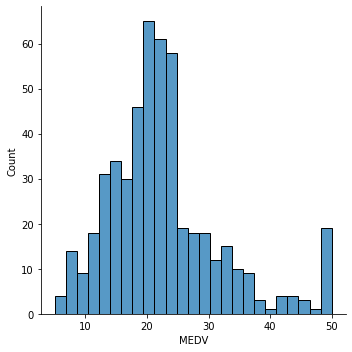

In [139]:
sns.displot(true_news["MEDV"], bins=25)

El conjunto de valores parece tener una distribución normal, con algunos outliers en 50.
A continuación se grafica la matriz de correlaciones.

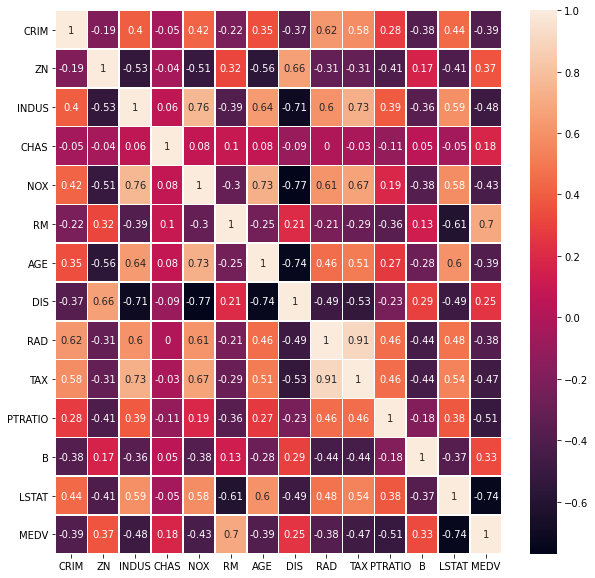

In [140]:
correlation_matrix = true_news.corr().round(2)
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(data=correlation_matrix,annot=True,linewidths=0.5,ax=ax)


En esta matriz ya se puede inferir el efecto de cada variable sobre el precio medio, y cuales variables están altamente relacionadas entre sí (como los gases de óxido nítrico y la distancia a las zonas de trabajo). Usando esta matriz de correlaciones se pueden elegir algunos atributos para realizar la regresión. Para elegirlos, me fijo en aquellos que presentan una correlación alta con MEDV (valor absoluto más cercano a 1). Ademas, si dos de los atributos tienen alta correlación entre sí, puedo descartar uno de ellos.
Siguiendo el criterio mencionado elijo las columnas LSTAT, PTRATIO y RM.

Por último, se quitan las filas que tienen algun valor NaN y las propiedades con MEDV<50 (quito outliers):



In [155]:
true_news_n=true_news[true_news.MEDV<50].dropna()
true_news_n

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


#Soluciones
##Regresión lineal con tres columnas
Un primer acercamiento sería plantear una regresión lineal utilizando los tres atributos seleccionados.

In [156]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X=true_news_n[["RM","PTRATIO", "LSTAT"]]
y=true_news_n["MEDV"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

linear_regressor = LinearRegression()
fit = linear_regressor.fit(X_train, y_train)
fit.score(X_train, y_train)




0.7479182264924598

Esta regresión nos da un R^2 de 0.75.
Usando el modelo para predecir precios, se pueden obtener otras métricas, como el error medio cuadrático:

In [157]:
from sklearn import metrics
y_pred = fit.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, y_pred))


4.248598281772024

El error medio cuadrático resulta 4248 dólares, que es aproximadamente el 20% de la media de valores

##Regresión LASSO
Este modelo penaliza el uso de coeficientes grándes minimizando el error cuadrado más un término proporcional a la norma l1.

In [158]:
from sklearn.linear_model import Lasso
lasso_regressor= Lasso()
fit_lasso = lasso_regressor.fit(X_train, y_train)
fit_lasso.score(X_train, y_train)

0.6922333147871549

In [159]:
y_pred_lasso = fit_lasso.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))

4.372636024478916

Esta regresión nos da un R^2 de 0.69 y un error medio cuadrático de 4372 dólares, peor que en el caso anterior.

#Regresión usando Random Forest
Utilizando un regresor Random forest:

In [160]:
from sklearn.ensemble import RandomForestRegressor
forest_regressor = RandomForestRegressor(random_state=0)
fit_forest= forest_regressor.fit(X_train, y_train)
fit_forest.score(X_train,y_train)

0.9771208812678592

In [161]:
y_pred_forest = fit_forest.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, y_pred_forest))

3.735155442158111

Esta regresión supera en términos de error medio cuadrático a las dos regresiones propuestas anteriormente. Considerando la liquidez baja del mercado inmobiliario, una diferencia de 3700 dólares sobre una propiedad que vale alrededor de 20000 es algo totalmente normal y que tranquilamente podría ser margen de ganancia de una inmobiliaria.

#Regresión Random Forest sin procesar los datos
Para probar si realmente contribuye en algo el preprocesamiento de datos que se hizo, pruebo si hacer un random forest con los datos "crudos" da mejores resultados o no.

In [163]:
X_c=true_news.drop(columns="MEDV")
y_c=true_news["MEDV"]
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, random_state=1)
forest_regressor = RandomForestRegressor(random_state=0)
fit_forest= forest_regressor.fit(X_train_c, y_train_c)
fit_forest.score(X_train_c,y_train_c)

0.9820022238218681

In [164]:
y_pred_forest_c = fit_forest.predict(X_test_c)
np.sqrt(metrics.mean_squared_error(y_test_c, y_pred_forest_c))

3.2985005510711494

"Tirándole" los datos crudos al random forest, el resultado es aún mejor. Esto puede indicar que el criterio de selección de los atributos no fue bueno. Sin embargo, aunque no esté expuesto en este trabajo, se comprobó que en general quitar columnas empeoraba la regresión (en algunos casos marginalmente).